In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Capstone/recipes.csv")

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.head(5)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
5,43,Best Blackbottom Pie,34879,Barefoot Beachcomber,PT2H,PT20M,PT2H20M,1999-08-21T10:35:00Z,Make and share this Best Blackbottom Pie recip...,character(0),...,10.9,94.3,267.6,58.0,1.8,42.5,7.0,8.0,1 9-inch pie,"c(""Graham Cracker Crust: In small bowl, combin..."
16,54,Carrot Cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.9,69.8,534.8,67.0,1.6,47.9,5.0,12.0,1 bundt,"c(""Beat together the eggs, oil, and white suga..."
26,64,Almond Pound Cake,125579,GrandmaIsCooking,PT1H,PT15M,PT1H15M,1999-08-07T16:33:00Z,Make and share this Almond Pound Cake recipe f...,character(0),...,9.0,118.9,159.4,56.0,1.3,29.0,6.9,10.0,1 cake,"c(""Preheat oven to 350 degrees Fahrenheit."", ""..."
54,94,Blueberry Buttertarts,1556,Strawberry Girl,PT25M,PT15M,PT40M,1999-09-12T05:46:00Z,Make and share this Blueberry Buttertarts reci...,character(0),...,4.7,17.6,125.7,40.2,1.2,11.5,4.2,12.0,12 tarts,"c(""Preheat oven to 375F."", ""Leave shells in fo..."


In [ ]:
df.isna().sum()

RecipeId                      0
Name                          0
AuthorId                      0
AuthorName                    0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeYield                   0
RecipeInstructions            0
dtype: int64

In [ ]:
dataset=df.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [ ]:
dataset.isna().sum()

RecipeId                 0
Name                     0
CookTime                 0
PrepTime                 0
TotalTime                0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
dtype: int64

In [ ]:
max_calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_calories,
          max_daily_fat,
          max_daily_Saturatedfat,
          max_daily_Cholesterol,
          max_daily_Sodium,
          max_daily_Carbohydrate,
          max_daily_Fiber,
          max_daily_Sugar,
          max_daily_Protein]

In [ ]:
dataset_ekstrak = dataset.copy()

for kolom, maksimum in zip(dataset_ekstrak.columns[6:15], max_list):
  dataset_ekstrak = dataset_ekstrak[dataset_ekstrak[kolom] < maksimum]

In [ ]:
dataset_ekstrak.head(10)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
26,64,Almond Pound Cake,PT1H,PT15M,PT1H15M,"c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",408.5,17.9,9.0,118.9,159.4,56.0,1.3,29.0,6.9,"c(""Preheat oven to 350 degrees Fahrenheit."", ""..."
54,94,Blueberry Buttertarts,PT25M,PT15M,PT40M,"c(""egg"", ""corn syrup"", ""lemon juice"", ""vanilla...",337.9,18.4,4.7,17.6,125.7,40.2,1.2,11.5,4.2,"c(""Preheat oven to 375F."", ""Leave shells in fo..."
87,131,Buttermilk-Oat Bread,PT20M,PT30M,PT50M,"c(""buttermilk"", ""honey"", ""butter"", ""margarine""...",68.7,0.7,0.3,1.4,88.4,13.3,0.6,1.7,2.1,"c(""For toasted rolled oats, place oats in a sh..."
121,168,Anzac Biscuits,PT15M,PT10M,PT25M,"c(""rolled oats"", ""plain flour"", ""sugar"", ""gold...",199.4,10.4,6.8,22.3,143.4,25.0,1.5,10.9,2.2,"c(""Mix oats, flour, sugar and coconut together..."
171,221,Chocolate Chip Muffins,PT40M,PT55M,PT1H35M,"c(""all-purpose flour"", ""whole wheat flour"", ""b...",264.6,11.2,6.5,51.6,139.4,38.8,2.2,17.8,5.0,"c(""Preheat oven to 400 degrees Fahrenheit."", ""..."
180,230,Fudgy Chocolate Crinkle Cookies,PT12M,PT10M,PT22M,"c(""sugar"", ""eggs"", ""vanilla"", ""salt"", ""flour"",...",298.7,11.9,3.6,52.9,137.7,46.8,1.6,32.6,4.1,"c(""Mix oil, chocolate, sugar; blend in eggs."",..."
229,287,Feijoada (Brazilian Bean Soup),PT2H13M,PT20M,PT2H33M,"c(""dried black beans"", ""onions"", ""turkey Polis...",286.9,5.8,1.8,15.7,436.8,43.2,10.0,3.1,16.6,"c(""Sort and wash beans; place in a large Dutch..."
267,328,Spicy Acorn Squash Soup,PT45M,PT35M,PT1H20M,"c(""low sodium chicken broth"", ""onions"", ""acorn...",156.7,5.4,1.0,0.0,248.6,23.2,2.4,2.4,6.1,"c(""Place 1/4 cup chicken broth in a large sauc..."
343,411,No-bake Honey Snacks,PT24H,PT25M,PT24H25M,"c(""raisins"", ""honey"", ""coconut"")",161.5,6.0,0.8,0.0,79.3,27.9,1.9,20.6,2.7,"c(""Grind raisins and nuts in small batches. S..."


<Axes: >

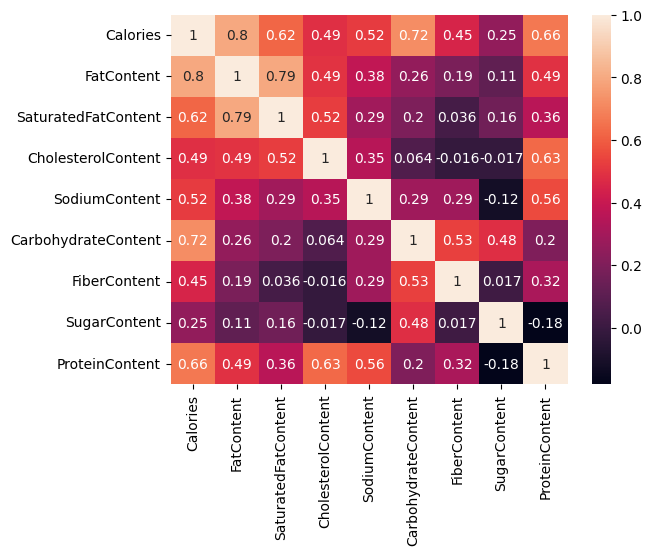

In [ ]:
sns.heatmap(dataset_ekstrak.iloc[:,6:15].corr(),annot=True)

In [ ]:
dataset_ekstrak = dataset_ekstrak.reset_index()

In [ ]:
dataset_ekstrak.drop(['index'], axis=1, inplace=True)

In [ ]:
min_max_scaler = MinMaxScaler()
dataset_ekstrak2 = dataset_ekstrak.iloc[:,6:15]

dataset_fit = min_max_scaler.fit_transform(dataset_ekstrak2)

In [ ]:
dataset_fit

array([[0.33098722, 0.26726058, 0.29457364, ..., 0.45888594, 0.80451128,
        0.29867482],
       [0.2522072 , 0.19933185, 0.69767442, ..., 0.03448276, 0.72681704,
        0.07033639],
       [0.20861888, 0.20489978, 0.36434109, ..., 0.03183024, 0.28822055,
        0.04281346],
       ...,
       [0.18552818, 0.21937639, 0.31007752, ..., 0.01856764, 0.10776942,
        0.23037717],
       [0.03111687, 0.04565702, 0.10077519, ..., 0.0397878 , 0.01253133,
        0.02038736],
       [0.14342162, 0.13585746, 0.13178295, ..., 0.04244032, 0.39598997,
        0.03363914]])

In [ ]:
model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(dataset_fit)
# KNN return 2 array yaitu distances dan indices
indices = model.kneighbors(dataset_fit, return_distance=False)

In [ ]:
indices.size

227170

In [ ]:
all_calories = list(dataset_ekstrak['Calories'].values)

In [ ]:
def closest(all_calories, input):
    return all_calories[min(range(len(all_calories)), key = lambda i: abs(all_calories[i]-input))]

# Breakfast = 0.35, Lunch = 0.40, Dinner = 0.25
total_calories = 2000
calories_per_eat_time = [total_calories*0.35,total_calories*0.40,total_calories*0.25]
calories_per_eat_time = np.array(calories_per_eat_time)
# searched_food = closest(all_calories, 200.1) # Kalori
searched_food=[]
for calories_per_eat_time in calories_per_eat_time:
  searched_food.append(closest(all_calories,calories_per_eat_time))

In [ ]:
searched_food_name_calory = dataset_ekstrak.loc[dataset_ekstrak['Calories']==searched_food[0]].head(1).Name.tolist()
searched_food_name_calory

['Red Lentil and Chorizo Soup']

In [ ]:
searched_food_name_calory = dataset_ekstrak.loc[dataset_ekstrak['Calories']==searched_food[1]].head(1).Name.tolist()
searched_food_name_calory

['Rachael Ray - Chicken Parm Sliders']

In [ ]:
searched_food_name_calory = dataset_ekstrak.loc[dataset_ekstrak['Calories']==searched_food[2]].head(1).Name.tolist()
searched_food_name_calory

["Mom's Peanut Butter Cookies"]

In [ ]:
searched_food_code_calory = []
for searched_food in searched_food:
  searched_food_code_calory.append(all_calories.index(searched_food))

In [ ]:
searched_food

500.0

In [ ]:
searched_food_code_calory

[13472, 18357, 11464]

In [ ]:
# dataset_ekstrak.loc[dataset_ekstrak['Calories']==searched_food].head(1)

In [ ]:
# print("FnB that related to : ",searched_food_name_calory[0])
# dataset_ekstrak.loc[indices[searched_food_code_calory]]
for i in range(len(searched_food_code_calory)):
  if i == 0:
    print('Breakfast')
    display(dataset_ekstrak.loc[indices[searched_food_code_calory[i]]])
  if i == 1:
    print('Lunch')
    display(dataset_ekstrak.loc[indices[searched_food_code_calory[i]]])
  if i == 2:
    print('Dinner')
    display(dataset_ekstrak.loc[indices[searched_food_code_calory[i]]])

Breakfast


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
13472,352385,Red Lentil and Chorizo Soup,PT30M,PT8M,PT38M,"c(""low sodium chicken broth"", ""water"", ""dried ...",700.1,35.7,12.0,66.5,1016.6,52.6,24.0,2.7,42.8,"c(""In a 5-quart soup pot, bring broth, water, ..."
12054,333028,Slow Cooker Taco-Chili Soup,PT6H,PT15M,PT6H15M,"c(""Mexican-style stewed tomatoes"", ""pinto bean...",635.5,27.7,10.7,99.8,895.9,55.6,14.1,2.2,43.8,"c(""Cut large pieces of stew meat in half and b..."
19748,447577,Chicken and White Bean Chili,PT50M,PT20M,PT1H10M,"c(""onion"", ""garlic cloves"", ""ground cumin"", ""d...",845.9,29.5,9.7,113.4,1107.6,89.9,21.9,5.0,58.5,"c(""1. Heat oil in dutch oven over medium heat...."
7070,235300,Santa Anna's Black Bean Casserole - Authentic ...,PT45M,PT15M,PT1H,"c(""onions"", ""green bell peppers"", ""plum tomato...",615.6,22.4,10.3,44.5,591.8,78.9,23.2,9.6,30.8,"c(""In a large skillet over medium heat, combin..."
10153,307069,Penne Strascicate,PT45M,PT15M,PT1H,"c(""carrot"", ""celery"", ""fresh parsley"", ""extra ...",909.2,38.7,11.0,77.7,765.2,100.5,14.1,4.9,37.0,"""In a heavy bottomed saucepan, saute the onion..."
11603,326506,Feijoada Richmond-Style,PT4H,PT8H,PT12H,"c(""dried black beans"", ""chorizo sausage"", ""kie...",593.0,33.6,11.5,74.6,1235.5,43.6,12.1,5.1,29.7,"c(""PREPARE BEANS:."", ""Soak beans in 4 cups wat..."
3895,145304,Mexican-Style Chicken Sandwiches,PT15M,PT20M,PT35M,"c(""mayonnaise"", ""fresh lime juice"", ""lime zest...",747.3,37.7,9.9,103.5,753.3,57.4,13.6,5.2,47.3,"c(""Whisk mayonnaise, lime juice and lime peel ..."
14811,371020,Chipotle Bean Tostadas,PT15M,PT15M,PT30M,"c(""olive oil"", ""onion"", ""ground cumin"", ""pinto...",850.1,47.4,11.3,34.6,447.8,83.9,21.2,5.4,27.5,"c(""1 Prepare the beans by sautéing onions in o..."
16167,390704,Rotisserie Chicken &amp; Veggie Stew,PT2H,PT15M,PT2H15M,"c(""chicken"", ""yellow onion"", ""russet potatoes""...",794.1,30.7,8.7,115.0,1422.6,97.1,24.5,4.7,46.4,"""separate chicken from the bone, disarding the..."
22292,509970,Southwest Steak Bowls,PT45M,PT20M,PT1H5M,"c(""olive oil"", ""garlic clove"", ""ground cumin"",...",835.3,30.6,12.4,108.2,974.4,98.3,12.3,5.5,44.8,"c(""1. To make the steak marinade, mince the ga..."


Lunch


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
18357,422220,Rachael Ray - Chicken Parm Sliders,PT15M,PT15M,PT30M,"c(""extra virgin olive oil"", ""garlic cloves"", ""...",803.3,24.7,5.5,126.4,1127.1,85.6,6.0,5.8,57.4,"c(""In a small pot with tight fitting lid heat ..."
2211,81725,Souvlaki,PT30M,PT30M,PT1H,"c(""olive oil"", ""Worcestershire sauce"", ""garlic...",811.8,34.7,6.0,110.7,824.1,75.9,4.5,5.2,47.3,"c(""To marinate meat: Cut tenderloin into bite-..."
9810,301622,Spicy Chicken Salad,PT20M,PT35M,PT55M,"c(""fresh lemon juice"", ""habanero pepper"", ""lem...",813.4,31.2,5.9,97.6,1296.9,92.3,5.2,8.2,42.1,"c(""Place lemon juice in a small saucepan and b..."
19696,446781,Lemon Parmesan Chicken,PT30M,PT10M,PT40M,"c(""boneless skinless chicken breasts"", ""mayonn...",672.1,22.7,7.1,98.1,1260.7,66.3,3.6,7.1,47.9,"c(""Preheat oven to 425 degrees F."", ""Spray bak..."
9640,298541,Buttermilk Fried Chicken,PT20M,PT15M,PT35M,"c(""chicken legs"", ""buttermilk"", ""all-purpose f...",669.9,22.3,6.4,141.9,1386.7,72.1,3.9,4.5,42.6,"c(""Heat oil in large cast iron skillet to appr..."
22132,503508,Vietnamese Sandwich,PT5M,PT10M,PT15M,"c(""boneless pork loin chops"", ""French baguette...",651.7,16.6,5.4,125.2,700.9,70.0,3.4,5.4,53.8,"c(""Preheat the oven's broiler. Place the pork..."
21836,495061,Ranch Chicken Sliders #RSC,PT10M,PT20M,PT30M,"c(""extra virgin olive oil"", ""bacon"", ""shallots...",595.7,21.2,4.9,117.1,810.1,53.0,5.8,6.9,47.6,"c(""Heat an outdoor grill or griddle pan to med..."
2584,102199,Golden Mushroom Chicken and Rice Casserole,PT1H,PT10M,PT1H10M,"c(""onion"", ""converted rice"", ""water"", ""chicken...",718.1,19.1,5.9,128.4,1435.8,92.5,2.8,6.5,39.9,"c(""Preheat oven to 350° Fahrenheit."", ""Grease ..."
21592,487492,Oriental Meatball Veggie Packets #RSC,PT30M,PT15M,PT45M,"c(""cornstarch"", ""soy sauce"", ""red wine vinegar...",623.6,18.0,7.0,129.6,1215.5,78.0,5.5,7.3,37.6,"c(""Preheat oven to 350 degrees F."", ""In a smal..."
13310,350169,Greeny's Comfort Crock Pot Mushroom Chicken,PT8H,PT15M,PT8H15M,"c(""dried parsley flakes"", ""boneless skinless c...",597.1,15.6,3.7,135.4,1279.9,71.9,5.5,7.7,42.0,"c(""Scatter the dried onion flakes and the pars..."


Dinner


,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
11464,324735,Mom's Peanut Butter Cookies,PT10M,PT15M,PT25M,"c(""white sugar"", ""brown sugar"", ""baking soda"",...",500.0,28.9,6.8,35.2,235.8,54.7,1.9,36.4,8.6,"c(""Mix in order."", ""Make in to balls, flatten ..."
913,25016,Tar Heel Pie,PT40M,PT10M,PT50M,"c(""chocolate chips"", ""margarine"", ""pecans"", ""v...",444.6,28.8,6.9,52.9,158.3,47.3,2.8,37.9,4.6,"c(""Pour warm butter over chocolate chips and s..."
6820,226445,Sweetened Condensed Milk Biscuits ( Cookies ),PT15M,PT2H,PT2H15M,"c(""margarine"", ""sugar"", ""salt"", ""flour"", ""swee...",502.3,23.9,6.4,13.5,302.6,65.5,1.0,36.7,7.2,"c(""Beat the margarine and sugar until creamy.""..."
3794,142497,Small Batch Chocolate Chip Cookies,PT10M,PT20M,PT30M,"c(""brown sugar"", ""sugar"", ""margarine"", ""eggs"",...",424.3,22.1,6.7,28.2,369.6,55.9,2.3,36.8,4.9,"c(""Cream sugars and margarine; blend in eggs a..."
9962,303934,Apple Bread,PT1H,PT30M,PT1H30M,"c(""eggs"", ""sugar"", ""flour"", ""baking soda"", ""sa...",429.0,25.5,7.1,50.5,245.1,48.6,1.5,32.8,3.6,"c(""Cream eggs, oil, sugar, and vanilla."", ""Add..."
10962,318664,Rich Chocolate Beetroot Cake,PT50M,PT20M,PT1H10M,"c(""beetroots"", ""eggs"", ""caster sugar"", ""chocol...",500.5,30.0,7.1,63.5,240.8,56.3,4.0,33.1,7.0,"c(""Finely chop beetroot in a food processor."",..."
20163,456500,Mocha Cupcakes,PT20M,PT25M,PT45M,"c(""eggs"", ""brewed coffee"", ""coffee"", ""cider vi...",408.6,21.5,7.5,47.1,270.0,53.2,1.5,38.9,3.6,"c(""In a large bowl, beat the eggs, coffee, oil..."
15792,385967,Spicy Chocolate Beet Cake With Chocolate Glaze,PT1H40M,PT25M,PT2H5M,"c(""beets"", ""baking soda"", ""salt"", ""ground clov...",434.3,23.7,7.4,64.3,342.3,54.1,3.5,35.6,6.0,"c(""Preheat the oven to 350*F."", ""Grease and fl..."
1786,58532,Carrot Cake,PT50M,PT30M,PT1H20M,"c(""flour"", ""sugar"", ""salt"", ""baking soda"", ""ci...",377.3,20.2,6.4,45.6,252.8,47.6,1.4,37.5,3.3,"c(""Preheat oven to 350."", ""Mix dry ingredients..."
20012,453514,Not German Apple Cake,PT1H30M,PT30M,PT2H,"c(""green apples"", ""white sugar"", ""brown sugar""...",609.4,38.2,6.5,54.7,251.8,62.5,2.6,35.8,6.6,"c(""Place chopped apples in lightly salted wate..."
